In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn import tree
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
#from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("CleanedEV.csv") 

In [5]:
dataX = df.drop(columns=['HFUEL'])
dataY = df[['HFUEL']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2)

# Naive bays model

In [7]:
gnb = GaussianNB(priors=None, var_smoothing=1.0)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
print(nbModel_grid.score(X_test, y_test))

y_pred = nbModel_grid.predict(X_test) 
print(classification_report(y_test,y_pred))  

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.0)
0.9799196787148594
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1220
           1       0.00      0.00      0.00        25

    accuracy                           0.98      1245
   macro avg       0.49      0.50      0.49      1245
weighted avg       0.96      0.98      0.97      1245



C:\Users\Chom\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: P

# Pumping the weight to independent variables and dependent variable by Using SMOTE with Naive bays

In [22]:
dataX_over = df.drop(columns=['HFUEL'])
dataY_over = df[['HFUEL']]
Over_Sample = SMOTE()
dataX_over , dataY_over = Over_Sample.fit_resample(dataX_over,dataY_over)

In [23]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(dataX_over, dataY_over, test_size = 0.2)

In [24]:
gnb = GaussianNB(priors=None, var_smoothing=1.0)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_over, y_train_over)
print(nbModel_grid.best_estimator_)
print(nbModel_grid.score(X_test_over, y_test_over))

y_pred = nbModel_grid.predict(X_test_over) 
print(classification_report(y_test_over,y_pred)) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB()
0.556013179571664
              precision    recall  f1-score   support

           0       0.70      0.20      0.31      1217
           1       0.53      0.92      0.67      1211

    accuracy                           0.56      2428
   macro avg       0.62      0.56      0.49      2428
weighted avg       0.62      0.56      0.49      2428



In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Logistic regression model

In [ ]:
model_logis1 = LogisticRegression()
classifier = model_logis1.fit(X_train,y_train)

In [ ]:
ypred_test = model_logis1.predict(X_test)
acc=format(accuracy_score(y_test,ypred_test), "0.2%")
print("Accuracy : ",acc)

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["0", "1"],cmap=plt.cm.Blues)
print(disp.confusion_matrix)

In [ ]:
print(classification_report(y_test,ypred_test))

# Pumping the weight to independent variables and dependent variable by Using SMOTE with Logistic regression 

In [ ]:
X_oversampling = df.drop(columns=['HFUEL']) #SMOTE
y_oversampling = df[['HFUEL']]
Oversampling = SMOTE()
X_oversampling , y_oversampling = Oversampling.fit_resample(X_oversampling,y_oversampling)

In [ ]:
name = []

for i in df.drop(columns=['HFUEL']):
  name.append(i)

df_new = pd.DataFrame(data = X_oversampling, columns= name)
df_new['HFUEL'] = y_oversampling

print(df.groupby(['HFUEL']).size().reset_index(name='counts'))
print(df_new.groupby(['HFUEL']).size().reset_index(name='counts')) 

In [ ]:
X_trainO, X_testO, y_trainO, y_testO = train_test_split(X_oversampling, y_oversampling, test_size = 0.2)

In [ ]:
model_logis2 = LogisticRegression()
classifier = model_logis2.fit(X_trainO,y_trainO)

In [ ]:
ypred_test = model_logis2.predict(X_testO)
acc=format(accuracy_score(y_testO,ypred_test), "0.2%")
print("Accuracy : ",acc)

In [ ]:
disp = plot_confusion_matrix(classifier, X_testO, y_testO, display_labels=["CV", "EV"],cmap=plt.cm.Blues)
print(disp.confusion_matrix)

In [ ]:
print(classification_report(y_testO,ypred_test))

In [ ]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]



#Using GridSearchCV
model = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'roc_auc', cv=10)
model.fit(X_train, y_train)



print(model.best_estimator_)
print(model.score(X_test, y_test))

# Decision Tree model

In [7]:
modelClf = DecisionTreeClassifier().fit(dataX, dataY)
for i,j in enumerate(dataX):
  score_f = modelClf.feature_importances_
  print(j, '= ', score_f[i])

Unnamed: 0 =  0.30406283021631064
HHFAMINC =  0.01729973347675635
HOMEOWN =  0.00785161587854956
HHSIZE =  0.042614417437682656
YOUNGCHILD =  0.01384742460585897
HHVEHCNT =  0.03466296188959538
URBRUR =  0.009987722020653405
HTPPOPDN =  0.025621870414286083
PRICE =  0.049925198769013183
PLACE =  0.04825609773010883
R_AGE_IMP =  0.10959875850336537
R_SEX_IMP =  0.005057789369617814
EDUC =  0.05673800342566417
R_RACE =  0.011032027543531693
GT1JBLWK =  0.03071408959539493
OCCAT =  0.01840634841472025
CARSHARE =  0.0005599053389291059
TIMETOWK =  0.087126320260493
YEARMILE =  0.09010241683841433
VEHAGE =  0.036534468271054374


[Text(177.41987469390568, 213.0912, 'X[0] <= 122344.0\ngini = 0.048\nsamples = 6221\nvalue = [6069, 152]'),
 Text(134.00352829446678, 204.3936, 'X[0] <= 809.5\ngini = 0.047\nsamples = 6219\nvalue = [6068, 151]'),
 Text(51.34063310845874, 195.696, 'X[0] <= 786.5\ngini = 0.202\nsamples = 35\nvalue = [31, 4]'),
 Text(49.950700570835494, 186.9984, 'X[9] <= 4.5\ngini = 0.114\nsamples = 33\nvalue = [31, 2]'),
 Text(48.56076803321225, 178.3008, 'X[5] <= 0.5\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(47.170835495588996, 169.60320000000002, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(45.78090295796575, 160.9056, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(48.56076803321225, 160.9056, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(49.950700570835494, 169.60320000000002, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(51.34063310845874, 178.3008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(52.73056564608199, 186.9984, 'gini = 0.0\nsamples = 2\nvalu

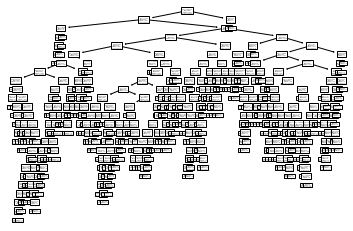

In [8]:
tree.plot_tree(modelClf) 

In [9]:
res_pred = modelClf.predict(X_test)
score = accuracy_score(y_test, res_pred)
score
print(classification_report(y_test, res_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       1.00      1.00      1.00        29

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245



In [10]:
confusion_matrix(res_pred , y_test) 

array([[1216,    0],
       [   0,   29]], dtype=int64)